In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [420]:
import os
import seaborn as sns
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [185]:
%matplotlib inline

In [186]:
data = pd.read_csv("adult.csv")

In [187]:
data.shape

(32561, 15)

In [188]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [190]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [191]:
data['income'].value_counts()    # Is the target variable skewed?

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [192]:
data.select_dtypes(exclude=[np.number]).head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [193]:
data = data.applymap(lambda x: np.nan if x=='?' else x) #Replace all '?'s with NaNs.

In [194]:
data.isnull().sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [195]:
data.shape[0] - data.dropna(axis=0).shape[0]   # how many rows will be removed if I remove all the NaN's?

2399

In [196]:
data = data.dropna(axis=0) ## Drop all the NaNs

In [197]:
data['income'] = data['income'].apply(lambda inc: 0 if inc == "<=50K" else 1)

In [198]:
data.education.value_counts()  # I will label-encode the education column since it is an ordinal categorical variable

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [199]:
## This computes the fraction of people by country who earn >50k per annum
mean_income_bycountry_df = data[['native.country','income']].groupby(['native.country']).mean().reset_index()

In [200]:
edu_encode_dict = {'Preschool':0,'1st-4th':1, '5th-6th':2, '7th-8th':3, '9th':4, '10th':5,
                  '11th':6, '12th':7, 'HS-grad':8, 'Some-college':9, 'Bachelors':10, 'Masters':11, 'Assoc-voc':12, 
                   'Assoc-acdm':13, 'Doctorate':14, 'Prof-school':15}

data['education'] = data['education'].apply(lambda ed_level: edu_encode_dict[ed_level])

In [201]:
data = pd.get_dummies(data,columns=['workclass','sex', 'marital.status',
                                    'race','relationship','occupation'],
               prefix=['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)
### native country is ignored because that feature will be dropped later

In [202]:
#data = pd.concat([data,temp_df], axis =1)
#data = data.drop(labels=['workclass','sex', 'marital.status','race','relationship'],axis=1)

In [203]:
data.select_dtypes(exclude=[np.number]).shape

(30162, 1)

In [204]:
#data['foo']=np.where(data['native.country']=='United-States',1,0)

In [206]:
data.groupby('income').mean()

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,is_Farming-fishing,is_Handlers-cleaners,is_Machine-op-inspct,is_Other-service,is_Priv-house-serv,is_Prof-specialty,is_Protective-serv,is_Sales,is_Tech-support,is_Transport-moving
income,,,,,,,,,,,,,,,,,,,,,
0,36.60806,190338.646729,8.462126,9.629116,148.893838,53.448000,39.348592,0.064359,0.768518,0.020923,...,0.038580,0.055928,0.075969,0.135958,0.006268,0.098305,0.019158,0.115388,0.027986,0.055310
1,43.95911,188149.962174,9.972163,11.606420,3937.679808,193.750666,45.706580,0.081113,0.649441,0.079915,...,0.015317,0.011055,0.032632,0.017581,0.000133,0.241209,0.027970,0.129196,0.037027,0.042488


In [142]:
data.shape

(30162, 44)

In [207]:
y = data.income
X = data.drop(['income', 'education', 'native.country','fnlwgt'],axis=1)
## native country is dropped because it showed very little feature importance in random forest

## Modelling

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier as xgb
from sklearn import metrics

### Baseline model

In [505]:
baseline_train = np.zeros(y_train.shape[0])
baseline_test = np.zeros(y_test.shape[0])
print('Accuracy on train data: %f%%' % (metrics.accuracy_score(y_train, baseline_train)))
print('Accuracy on test data: %f%%' %  (metrics.accuracy_score(y_test, baseline_test)))

Accuracy on train data: 0.753091%
Accuracy on test data: 0.746381%


### Random Forest

In [458]:
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5, max_depth=10,random_state=10)
rfmodel.fit(X_train,y_train)
print(rfmodel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)


In [456]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('confusion matrix of training data')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('confusion matrix of test data')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('classification report of test data')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
    print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, clf.predict(X_test))*100))
    print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, clf.predict(X_train)*100)))
    print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, clf.predict(X_test))))

In [459]:
show_classifier_metrics(rfmodel,y_train)
print('oob score = %f'% rfmodel.oob_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)
confusion matrix of training data
[[15280   620]
 [ 2250  2963]]
confusion matrix of test data
[[6440  314]
 [1007 1288]]
classification report of test data
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6754
           1       0.80      0.56      0.66      2295

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.83      0.76      0.78      9049
weighted avg       0.85      0.85      0.84      9049

Accuracy on test data: 85.401702%
Accuracy on training data: 0.723725%
Area under the ROC curve : 0.757365
o

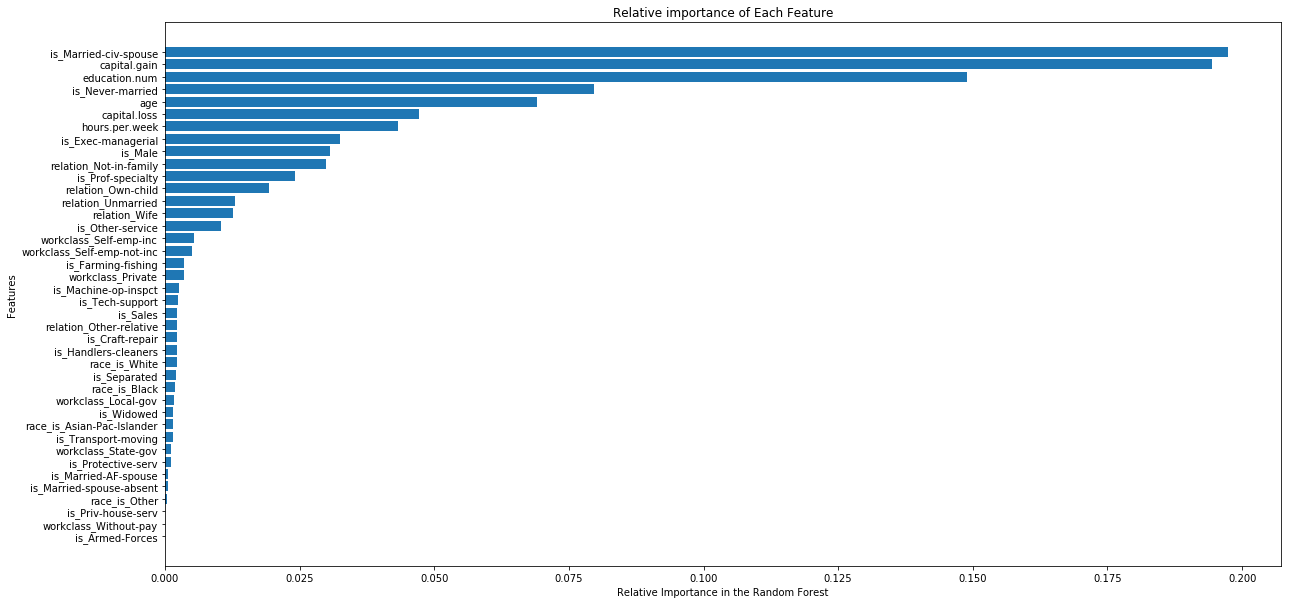

In [462]:
importance_list = rfmodel.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [150]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [42]:
def grid_search(clf, parameters, X, y, n_jobs= -1, n_folds=4, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func,verbose =2)
    else:
        print('Doing grid search')
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose =2)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_)
    best = gs.best_estimator_
    return best

In [463]:
rfmodel2 = RandomForestClassifier(min_samples_split=5,oob_score=True, n_jobs=-1,random_state=10)
parameters = {'n_estimators': [100,200,300], 'max_depth': [10,13,15,20]}
rfmodelCV = grid_search(rfmodel2, parameters,X_train,y_train)

Doing grid search
Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.1min finished


BEST {'max_depth': 15, 'n_estimators': 200} 0.8576706294699948


In [464]:
rfmodelCV.fit(X_train,y_train)
show_classifier_metrics(rfmodelCV,y_train)
print('oob score = %f'% rfmodelCV.oob_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)
confusion matrix of training data
[[15301   599]
 [ 1848  3365]]
confusion matrix of test data
[[6396  358]
 [ 926 1369]]
classification report of test data
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6754
           1       0.79      0.60      0.68      2295

   micro avg       0.86      0.86      0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049

Accuracy on test data: 85.810587%
Accuracy on training data: 0.724719%
Area under the ROC curve : 0.771754
oob

### XGBoost 

In [151]:
from xgboost.sklearn import XGBClassifier

In [379]:
param = {}
param['learning_rate'] = 0.1
param['verbosity'] = 1
param['colsample_bylevel'] = 0.9
param['colsample_bytree'] = 0.9
param['subsample'] = 0.9
param['reg_lambda']= 1.5
param['max_depth'] = 5
param['n_estimators'] = 400
param['seed']=10
xgb= XGBClassifier(**param)
xgb.fit(X_train, y_train, eval_metric=['error'], eval_set=[(X_train, y_train),(X_test, y_test)],early_stopping_rounds=30)

[0]	validation_0-error:0.155212	validation_1-error:0.159797
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.15436	validation_1-error:0.158692
[2]	validation_0-error:0.154644	validation_1-error:0.158471
[3]	validation_0-error:0.149576	validation_1-error:0.154382
[4]	validation_0-error:0.147918	validation_1-error:0.153277
[5]	validation_0-error:0.147018	validation_1-error:0.151398
[6]	validation_0-error:0.147113	validation_1-error:0.152061
[7]	validation_0-error:0.147066	validation_1-error:0.151508
[8]	validation_0-error:0.146924	validation_1-error:0.151287
[9]	validation_0-error:0.146782	validation_1-error:0.151619
[10]	validation_0-error:0.14664	validation_1-error:0.151619
[11]	validation_0-error:0.146829	validation_1-error:0.151177
[12]	validation_0-error:0.145598	validation_1-error:0.149519
[13]	validation_0-error:0.145219	validation_1-error:0.1491

[132]	validation_0-error:0.121584	validation_1-error:0.131175
[133]	validation_0-error:0.121726	validation_1-error:0.131175
[134]	validation_0-error:0.121726	validation_1-error:0.131285
[135]	validation_0-error:0.121584	validation_1-error:0.130843
[136]	validation_0-error:0.121631	validation_1-error:0.130843
[137]	validation_0-error:0.121584	validation_1-error:0.130843
[138]	validation_0-error:0.1213	validation_1-error:0.130512
[139]	validation_0-error:0.1213	validation_1-error:0.130512
[140]	validation_0-error:0.1213	validation_1-error:0.13007
[141]	validation_0-error:0.121347	validation_1-error:0.129959
[142]	validation_0-error:0.121394	validation_1-error:0.129849
[143]	validation_0-error:0.121063	validation_1-error:0.130401
[144]	validation_0-error:0.12111	validation_1-error:0.130622
[145]	validation_0-error:0.120779	validation_1-error:0.130401
[146]	validation_0-error:0.120589	validation_1-error:0.130622
[147]	validation_0-error:0.120447	validation_1-error:0.130954
[148]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
       silent=True, subsample=0.9, verbosity=1)

In [380]:
show_classifier_metrics(xgb,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
       silent=True, subsample=0.9, verbosity=1)
confusion matrix of training data
[[15070   830]
 [ 1733  3480]]
confusion matrix of test data
[[6361  393]
 [ 782 1513]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6754
           1       0.79      0.66      0.72      2295

   micro avg       0.87      0.87      0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049

Accuracy on test data: 87.015140%
Accuracy on training data: 0.713778%
Area under the ROC curve : 0.800536


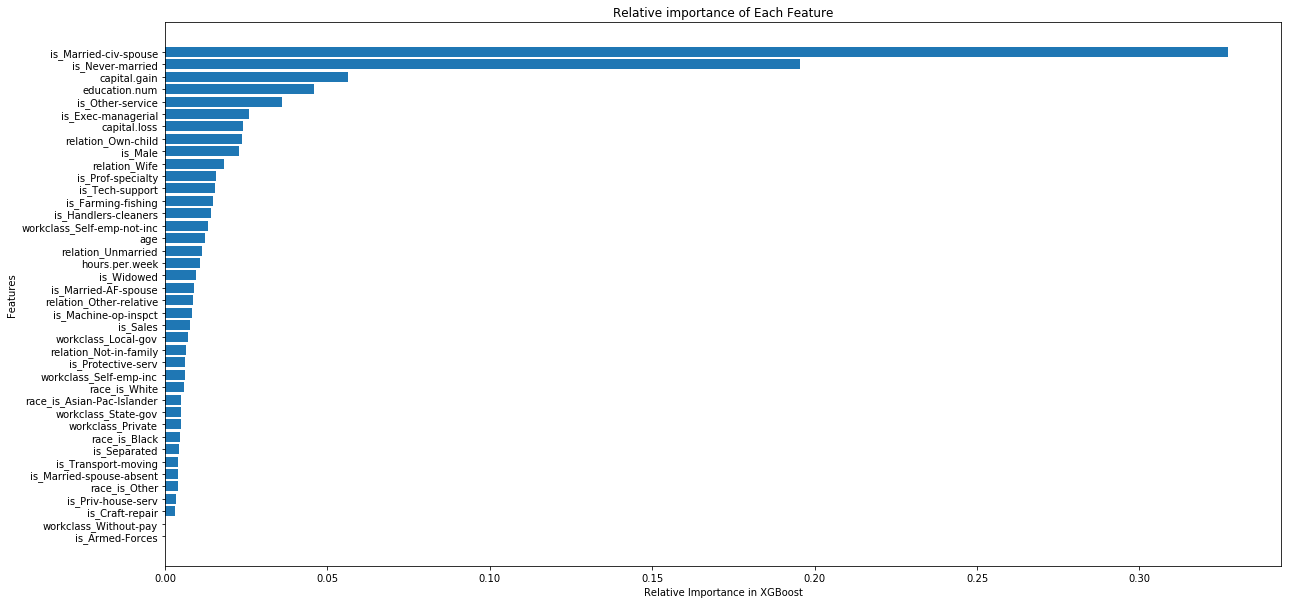

In [292]:
importance_list = xgb.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in XGBoost')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

### Grid search with cross validation: XGBoost model

In [472]:
xgbmodel2 = XGBClassifier(seed=42)
param = {
'learning_rate': [0.1],
'verbosity': [1],
'colsample_bylevel': [0.9],
'colsample_bytree': [0.9],
'subsample' : [0.9],
'n_estimators': [300],
'reg_lambda': [1.5,2],
'max_depth': [3,5,7],
 'seed': [10]   
}
xgbCV = grid_search(xgbmodel2, param,X_train,y_train)

Doing grid search
Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.6min finished


BEST {'colsample_bylevel': 0.9, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 2, 'seed': 10, 'subsample': 0.9, 'verbosity': 1} 0.8678539288589968


In [473]:
xgbCV.fit(X_train, y_train, eval_metric=['error'], eval_set=[(X_train, y_train),(X_test, y_test)],early_stopping_rounds=30)

[0]	validation_0-error:0.155212	validation_1-error:0.159797
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.154691	validation_1-error:0.159023
[2]	validation_0-error:0.154739	validation_1-error:0.158581
[3]	validation_0-error:0.149576	validation_1-error:0.154492
[4]	validation_0-error:0.147918	validation_1-error:0.153056
[5]	validation_0-error:0.147018	validation_1-error:0.151398
[6]	validation_0-error:0.147113	validation_1-error:0.152061
[7]	validation_0-error:0.146829	validation_1-error:0.151287
[8]	validation_0-error:0.147018	validation_1-error:0.151508
[9]	validation_0-error:0.146829	validation_1-error:0.151729
[10]	validation_0-error:0.146592	validation_1-error:0.151619
[11]	validation_0-error:0.14645	validation_1-error:0.151066
[12]	validation_0-error:0.146071	validation_1-error:0.149519
[13]	validation_0-error:0.145124	validation_1-error:0.149

[132]	validation_0-error:0.121584	validation_1-error:0.131506
[133]	validation_0-error:0.121489	validation_1-error:0.131506
[134]	validation_0-error:0.121489	validation_1-error:0.131396
[135]	validation_0-error:0.121347	validation_1-error:0.131617
[136]	validation_0-error:0.121205	validation_1-error:0.131396
[137]	validation_0-error:0.121158	validation_1-error:0.131396
[138]	validation_0-error:0.120968	validation_1-error:0.131064
[139]	validation_0-error:0.121015	validation_1-error:0.131064
[140]	validation_0-error:0.121015	validation_1-error:0.130733
[141]	validation_0-error:0.120826	validation_1-error:0.130733
[142]	validation_0-error:0.120826	validation_1-error:0.130733
[143]	validation_0-error:0.120637	validation_1-error:0.130401
[144]	validation_0-error:0.120447	validation_1-error:0.130401
[145]	validation_0-error:0.120779	validation_1-error:0.130291
[146]	validation_0-error:0.120873	validation_1-error:0.130401
[147]	validation_0-error:0.120873	validation_1-error:0.131064
[148]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=10, silent=True,
       subsample=0.9, verbosity=1)

In [474]:
show_classifier_metrics(xgbCV,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=10, silent=True,
       subsample=0.9, verbosity=1)
confusion matrix of training data
[[15083   817]
 [ 1710  3503]]
confusion matrix of test data
[[6356  398]
 [ 776 1519]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6754
           1       0.79      0.66      0.72      2295

   micro avg       0.87      0.87      0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049

Accuracy on test data: 87.026191%
Accuracy on training data: 0.714394%
Area under the ROC curve : 0.801473


In [167]:
#X_test.iloc[np.where(y_test != xgbCV.predict(X_test))]

## Logistic regression

In [182]:
from sklearn.linear_model import LogisticRegression

In [226]:
logreg = LogisticRegression(C=0.8,random_state=42,max_iter=200)
logreg.fit(X_train, y_train)

/Users/debashis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=3, warm_start=False)

In [263]:
show_classifier_metrics(logreg,y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=3, warm_start=False)
confusion matrix of training data
[[14776  1124]
 [ 2050  3163]]
confusion matrix of test data
[[6226  528]
 [ 905 1390]]
classification report of test data
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6754
           1       0.72      0.61      0.66      2295

   micro avg       0.84      0.84      0.84      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049

Accuracy on test data: 84.163996%
Accuracy on training data: 0.699853%
Area under the ROC curve : 0.763744


## Naive Bayes

In [281]:
from sklearn.naive_bayes import GaussianNB

In [282]:
NBmodel = GaussianNB()

In [425]:
NBmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [426]:
NBmodel.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [427]:
show_classifier_metrics(NBmodel,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[13445  2455]
 [ 1309  3904]]
confusion matrix of test data
[[5694 1060]
 [ 588 1707]]
classification report of test data
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      6754
           1       0.62      0.74      0.67      2295

   micro avg       0.82      0.82      0.82      9049
   macro avg       0.76      0.79      0.77      9049
weighted avg       0.83      0.82      0.82      9049

Accuracy on test data: 81.788043%
Accuracy on training data: 0.636811%
Area under the ROC curve : 0.793423


### Stacked model

In [404]:
def create_stacked_dataset(clfs,modelnames, X_train=X_train,X_test=X_test):
    X_train_stack, X_test_stack = X_train, X_test
    for clf,modelname in zip(clfs,modelnames):
        temptrain = pd.DataFrame(clf.predict(X_train),index = X_train.index,columns=[modelname+'_prediction'])
        temptest  = pd.DataFrame(clf.predict(X_test),index = X_test.index,columns=[modelname+'_prediction'])
        X_train_stack = pd.concat([X_train_stack, temptrain], axis=1)
        X_test_stack = pd.concat([X_test_stack, temptest], axis=1)
    return (X_train_stack,X_test_stack)

In [485]:
X_train_stack,X_test_stack = create_stacked_dataset([NBmodel,rfmodel,logreg,xgb],modelnames=['NBmodel','rfmodel','logreg','xgb'])

In [486]:
X_train_stack.head(2)

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,is_Priv-house-serv,is_Prof-specialty,is_Protective-serv,is_Sales,is_Tech-support,is_Transport-moving,NBmodel_prediction,rfmodel_prediction,logreg_prediction,xgb_prediction
29235,59,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14256,27,9,0,0,45,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [491]:
param = {}
param['learning_rate'] = 0.1
param['verbosity'] = 1
param['colsample_bylevel'] = 0.9
param['colsample_bytree'] = 0.9
param['subsample'] = 0.9
param['reg_lambda']= 1.5
param['max_depth'] = 5#10
param['n_estimators'] = 400
param['seed']=10
xgbstack= XGBClassifier(**param)
xgbstack.fit(X_train_stack, y_train, eval_metric=['error'], eval_set=[(X_train_stack, y_train),(X_test_stack, y_test)],early_stopping_rounds=30)


[0]	validation_0-error:0.121158	validation_1-error:0.129517
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.123431	validation_1-error:0.133827
[2]	validation_0-error:0.122768	validation_1-error:0.130954
[3]	validation_0-error:0.122768	validation_1-error:0.132169
[4]	validation_0-error:0.122247	validation_1-error:0.130401
[5]	validation_0-error:0.121726	validation_1-error:0.130512
[6]	validation_0-error:0.121205	validation_1-error:0.129738
[7]	validation_0-error:0.1213	validation_1-error:0.129959
[8]	validation_0-error:0.121252	validation_1-error:0.129959
[9]	validation_0-error:0.1213	validation_1-error:0.129849
[10]	validation_0-error:0.121347	validation_1-error:0.129849
[11]	validation_0-error:0.121347	validation_1-error:0.129849
[12]	validation_0-error:0.121394	validation_1-error:0.129849
[13]	validation_0-error:0.121394	validation_1-error:0.129959

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
       silent=True, subsample=0.9, verbosity=1)

In [492]:
print(metrics.classification_report(y_test, xgbstack.predict(X_test_stack)))
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, xgbstack.predict(X_test_stack))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, xgbstack.predict(X_train_stack)*100)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6754
           1       0.80      0.66      0.72      2295

   micro avg       0.87      0.87      0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049

Accuracy on test data: 87.048293%
Accuracy on training data: 0.714015%


### Stacked model Grid Search

In [470]:
xgbstackCV = XGBClassifier(seed=10)
param_grid = {}
param_grid['learning_rate'] = [0.1]
param_grid['colsample_bylevel'] = [0.9]
param_grid['colsample_bytree'] = [0.9]
param_grid['subsample'] = [0.9]
param_grid['n_estimators'] = [300]
param_grid['reg_lambda']= [1.5]
param_grid['seed'] =[10]
param_grid['max_depth'] = [3,5,8,10]
xgbstackCV_grid = grid_search(xgbstackCV, param_grid,X_train_stack,y_train)

Doing grid search
Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.0min finished


BEST {'colsample_bylevel': 0.9, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 1.5, 'seed': 10, 'subsample': 0.9} 0.8669066451949036


In [475]:
xgbstackCV_grid.fit(X_train_stack, y_train, eval_metric=['error'], eval_set=[(X_train_stack, y_train),(X_test_stack, y_test)],early_stopping_rounds=30)

[0]	validation_0-error:0.175674	validation_1-error:0.186761
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.146876	validation_1-error:0.155929
[2]	validation_0-error:0.145076	validation_1-error:0.153387
[3]	validation_0-error:0.144745	validation_1-error:0.152393
[4]	validation_0-error:0.144745	validation_1-error:0.152503
[5]	validation_0-error:0.142377	validation_1-error:0.150182
[6]	validation_0-error:0.140814	validation_1-error:0.147972
[7]	validation_0-error:0.140956	validation_1-error:0.147751
[8]	validation_0-error:0.140198	validation_1-error:0.146867
[9]	validation_0-error:0.140719	validation_1-error:0.147199
[10]	validation_0-error:0.141335	validation_1-error:0.146204
[11]	validation_0-error:0.141382	validation_1-error:0.146425
[12]	validation_0-error:0.141287	validation_1-error:0.14742
[13]	validation_0-error:0.140435	validation_1-error:0.145

[132]	validation_0-error:0.122484	validation_1-error:0.132169
[133]	validation_0-error:0.122342	validation_1-error:0.131838
[134]	validation_0-error:0.122342	validation_1-error:0.131617
[135]	validation_0-error:0.121915	validation_1-error:0.131285
[136]	validation_0-error:0.121915	validation_1-error:0.131285
[137]	validation_0-error:0.121773	validation_1-error:0.131617
[138]	validation_0-error:0.121489	validation_1-error:0.13228
[139]	validation_0-error:0.121915	validation_1-error:0.131948
[140]	validation_0-error:0.121679	validation_1-error:0.131948
[141]	validation_0-error:0.121584	validation_1-error:0.132169
[142]	validation_0-error:0.121394	validation_1-error:0.131838
[143]	validation_0-error:0.1213	validation_1-error:0.132169
[144]	validation_0-error:0.121205	validation_1-error:0.132169
[145]	validation_0-error:0.121158	validation_1-error:0.132611
[146]	validation_0-error:0.121063	validation_1-error:0.132611
[147]	validation_0-error:0.120684	validation_1-error:0.132169
[148]	valid

In [479]:
print(metrics.classification_report(y_test, xgbstack.predict(X_test_stack)))
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, xgbstack.predict(X_test_stack))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, xgbstack.predict(X_train_stack)*100)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6754
           1       0.78      0.67      0.72      2295

   micro avg       0.87      0.87      0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.86      0.87      0.87      9049

Accuracy on test data: 86.871478%
Accuracy on training data: 0.708663%


In [508]:
from catboost import CatBoostClassifier

In [558]:
catb = CatBoostClassifier(learning_rate=0.1,iterations=400,verbose=1,random_seed=10,eval_metric='Accuracy',rsm=0.8)

In [559]:
catb.fit(X_train,y_train,eval_set=[(X_train,y_train), (X_test,y_test)],early_stopping_rounds=30)

0:	learn: 0.8450244	test: 0.8450244	test1: 0.8431871	best: 0.8431871 (0)	total: 47.1ms	remaining: 18.8s
1:	learn: 0.8442192	test: 0.8442192	test1: 0.8399823	best: 0.8431871 (0)	total: 90.5ms	remaining: 18s
2:	learn: 0.8448823	test: 0.8448823	test1: 0.8405349	best: 0.8431871 (0)	total: 131ms	remaining: 17.4s
3:	learn: 0.8441718	test: 0.8441718	test1: 0.8395403	best: 0.8431871 (0)	total: 177ms	remaining: 17.5s
4:	learn: 0.8458296	test: 0.8458296	test1: 0.8420820	best: 0.8431871 (0)	total: 215ms	remaining: 17s
5:	learn: 0.8483399	test: 0.8483399	test1: 0.8447342	best: 0.8447342 (5)	total: 265ms	remaining: 17.4s
6:	learn: 0.8493819	test: 0.8493819	test1: 0.8463919	best: 0.8463919 (6)	total: 317ms	remaining: 17.8s
7:	learn: 0.8494766	test: 0.8494766	test1: 0.8468339	best: 0.8468339 (7)	total: 362ms	remaining: 17.8s
8:	learn: 0.8502818	test: 0.8502818	test1: 0.8468339	best: 0.8468339 (7)	total: 407ms	remaining: 17.7s
9:	learn: 0.8503292	test: 0.8503292	test1: 0.8478285	best: 0.8478285 (9)	to

81:	learn: 0.8647279	test: 0.8647279	test1: 0.8614212	best: 0.8615317 (79)	total: 4.65s	remaining: 18s
82:	learn: 0.8649173	test: 0.8649173	test1: 0.8615317	best: 0.8615317 (79)	total: 4.73s	remaining: 18.1s
83:	learn: 0.8650121	test: 0.8650121	test1: 0.8615317	best: 0.8615317 (79)	total: 4.78s	remaining: 18s
84:	learn: 0.8648700	test: 0.8648700	test1: 0.8607581	best: 0.8615317 (79)	total: 4.84s	remaining: 17.9s
85:	learn: 0.8649173	test: 0.8649173	test1: 0.8612001	best: 0.8615317 (79)	total: 4.91s	remaining: 17.9s
86:	learn: 0.8649173	test: 0.8649173	test1: 0.8614212	best: 0.8615317 (79)	total: 4.97s	remaining: 17.9s
87:	learn: 0.8652015	test: 0.8652015	test1: 0.8615317	best: 0.8615317 (79)	total: 5.05s	remaining: 17.9s
88:	learn: 0.8652015	test: 0.8652015	test1: 0.8614212	best: 0.8615317 (79)	total: 5.1s	remaining: 17.8s
89:	learn: 0.8650121	test: 0.8650121	test1: 0.8610896	best: 0.8615317 (79)	total: 5.16s	remaining: 17.8s
90:	learn: 0.8649173	test: 0.8649173	test1: 0.8608686	best: 

162:	learn: 0.8726377	test: 0.8726377	test1: 0.8682727	best: 0.8682727 (161)	total: 9.44s	remaining: 13.7s
163:	learn: 0.8724483	test: 0.8724483	test1: 0.8680517	best: 0.8682727 (161)	total: 9.48s	remaining: 13.6s
164:	learn: 0.8724956	test: 0.8724956	test1: 0.8682727	best: 0.8682727 (161)	total: 9.56s	remaining: 13.6s
165:	learn: 0.8725430	test: 0.8725430	test1: 0.8682727	best: 0.8682727 (161)	total: 9.62s	remaining: 13.6s
166:	learn: 0.8725903	test: 0.8725903	test1: 0.8682727	best: 0.8682727 (161)	total: 9.69s	remaining: 13.5s
167:	learn: 0.8725903	test: 0.8725903	test1: 0.8682727	best: 0.8682727 (161)	total: 9.75s	remaining: 13.5s
168:	learn: 0.8725903	test: 0.8725903	test1: 0.8688253	best: 0.8688253 (168)	total: 9.81s	remaining: 13.4s
169:	learn: 0.8728272	test: 0.8728272	test1: 0.8688253	best: 0.8688253 (168)	total: 9.87s	remaining: 13.3s
170:	learn: 0.8729693	test: 0.8729693	test1: 0.8688253	best: 0.8688253 (168)	total: 9.93s	remaining: 13.3s
171:	learn: 0.8729693	test: 0.8729693

In [557]:
show_classifier_metrics(catb)

confusion matrix of training data
[[15074   826]
 [ 1830  3383]]
confusion matrix of test data
[[6376  378]
 [ 809 1486]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6754
           1       0.80      0.65      0.71      2295

   micro avg       0.87      0.87      0.87      9049
   macro avg       0.84      0.80      0.81      9049
weighted avg       0.86      0.87      0.86      9049

Accuracy on test data: 86.882528%
Accuracy on training data: 0.713968%
Area under the ROC curve : 0.795764
